In [1]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm
import datetime
import matplotlib.dates as mdates

In [2]:
import os
path = os.getcwd()
print(path)

C:\home\program


In [3]:
os.chdir('../')

In [4]:
#os.chdir('./home')
print(os.getcwd())

C:\home


In [5]:
stock = read_csv('program/stock2.csv',index_col='day',parse_dates=True)
day = read_csv('program/stock2.csv')
print(stock.head())

             start   hight     low     end
day                                       
2017-04-03  4695.0  4790.0  4655.0  4745.0
2017-04-04  4715.0  4720.0  4600.0  4625.0
2017-04-05  4585.0  4595.0  4505.0  4505.0
2017-04-06  4500.0  4505.0  4440.0  4445.0
2017-04-07  4510.0  4550.0  4490.0  4495.0


In [6]:
start = stock[['start']]
hight = stock[['hight']]
low = stock[['low']]
end = stock[['end']]

C:\home\anaconda\envs\TF\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


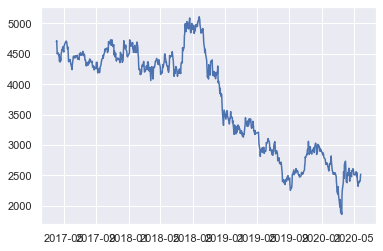

In [7]:
plt.plot(start)

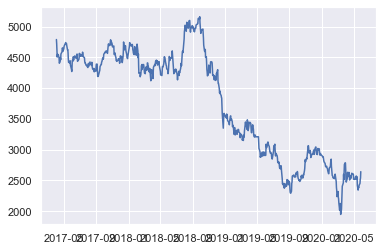

In [8]:
plt.plot(hight)

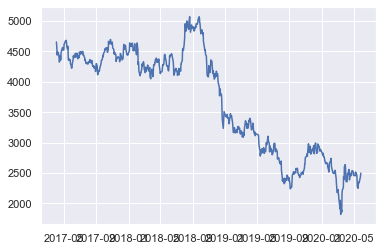

In [9]:
plt.plot(low)

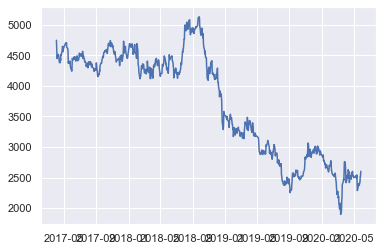

In [10]:
plt.plot(end)

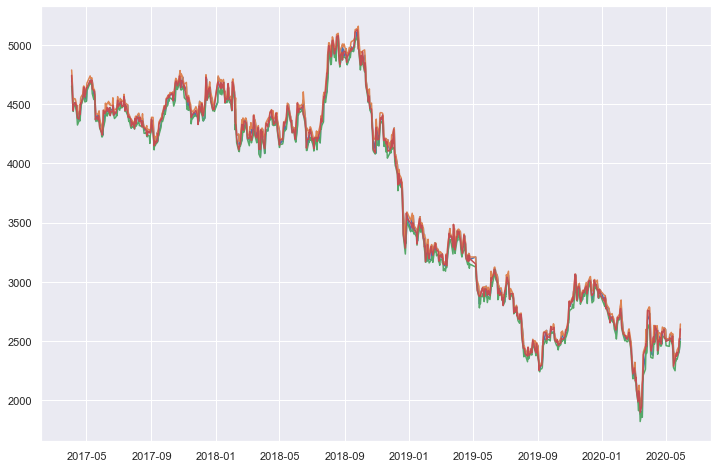

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(stock)

In [12]:
Stock = pd.read_excel('program/stock.xlsx')
print(Stock.head())

         day  start  hight   low   end
0 2018-04-02   4210   4225  4130  4140
1 2018-04-03   4085   4155  4085  4125
2 2018-04-04   4135   4240  4125  4230
3 2018-04-05   4250   4340  4230  4310
4 2018-04-06   4285   4350  4280  4340


In [13]:
timeSeries = Stock.loc[:, ["day","end"]]
timeSeries.index = timeSeries.day
ts = timeSeries.drop("day",axis=1)

C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32066 missing from c

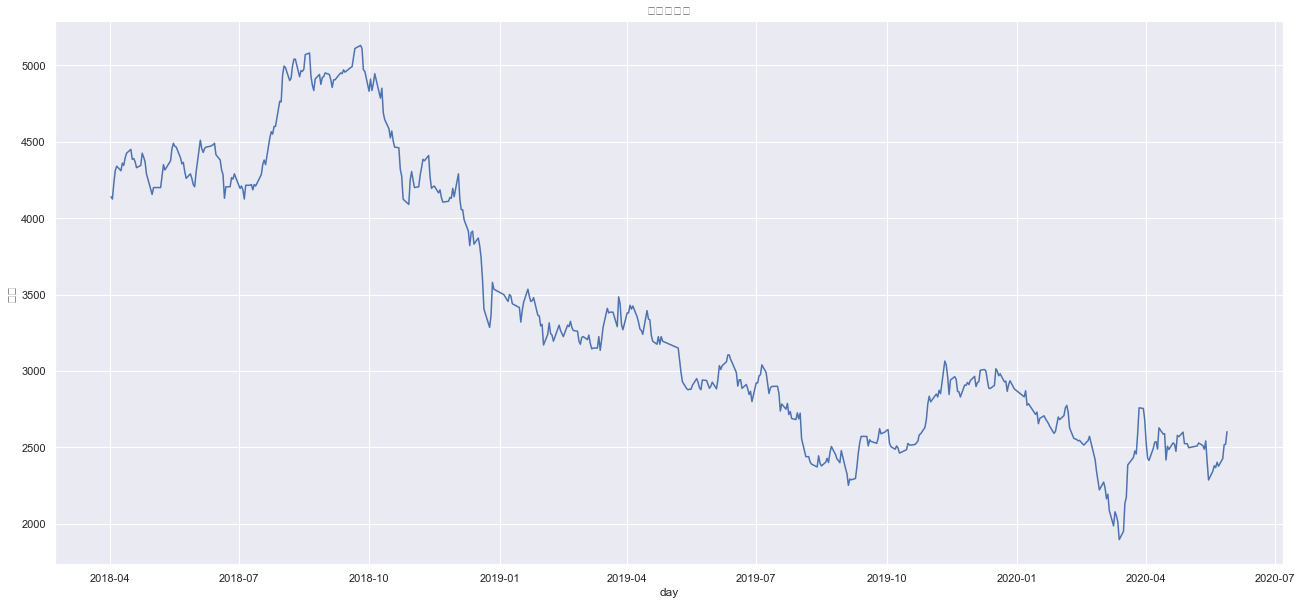

In [14]:
plt.figure(figsize=(22,10))
plt.plot(Stock.day,Stock.end)
plt.title("株式データ")
plt.xlabel("day")
plt.ylabel("終値")
plt.show()

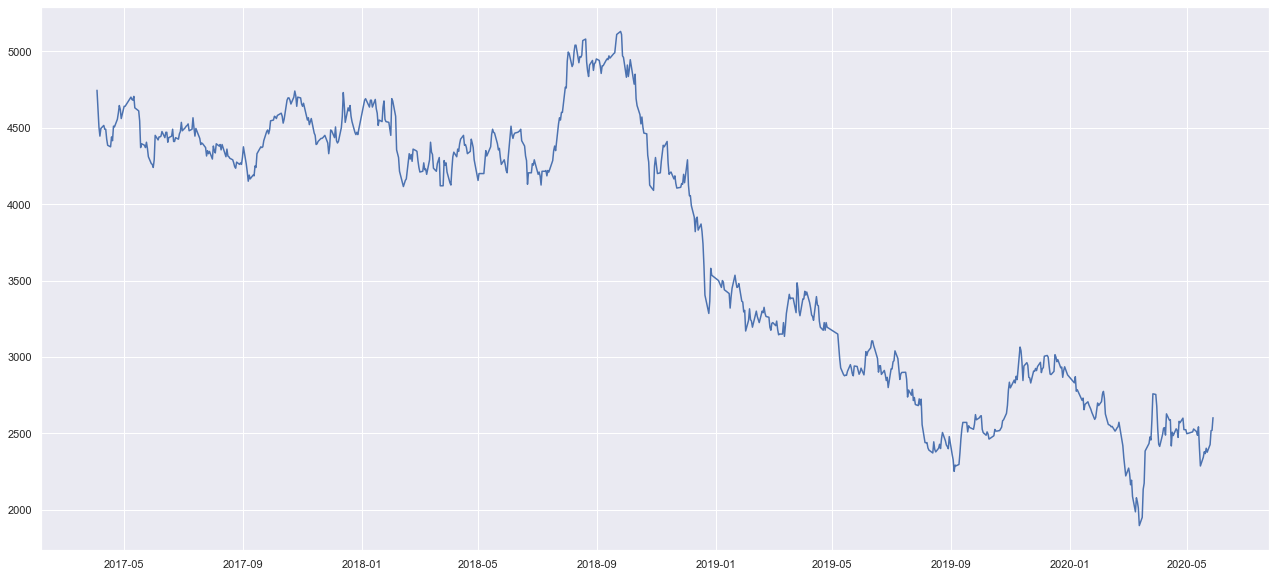

In [15]:
plt.figure(figsize=(22, 10))
plt.plot(end)

In [16]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(ts, order=(1,0,0)).fit(dist=False)
arima_model2 = ARIMA(end, order=(1,0,0)).fit(dist=False)

C:\home\anaconda\envs\TF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\home\anaconda\envs\TF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [17]:
forecast = arima_model.predict('2019-04-01', '2020-05-28')
forecast2 = arima_model2.predict('2017-04-03', '2020-05-28')

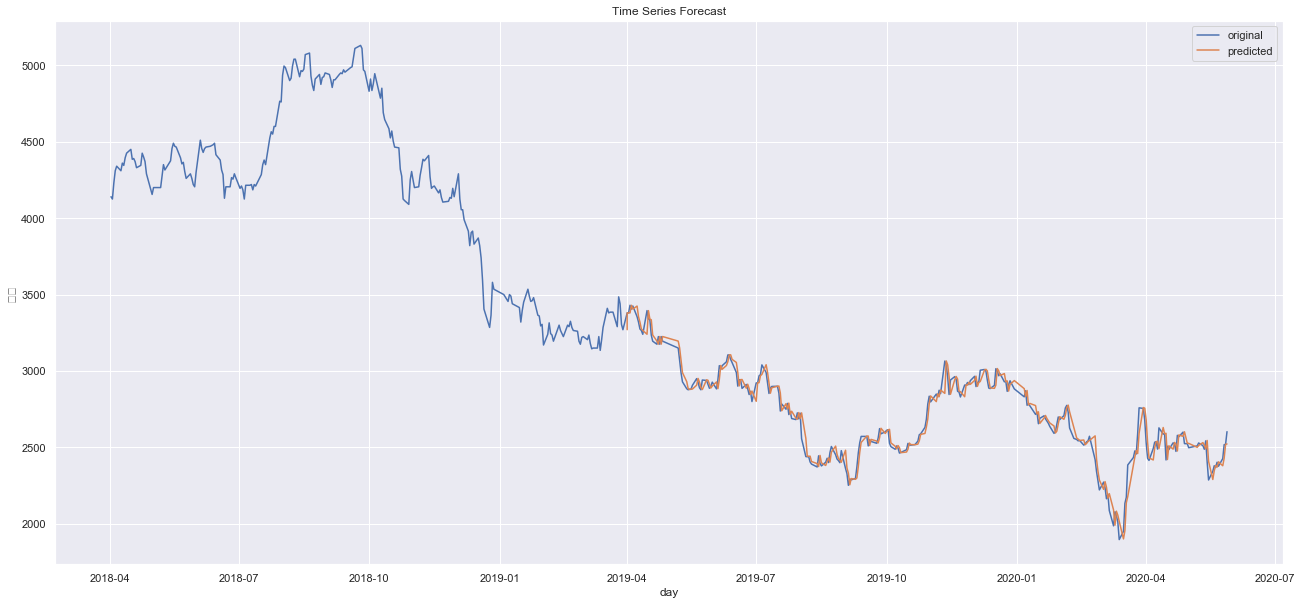

In [18]:
plt.figure(figsize=(22,10))
plt.plot(Stock.day,Stock.end,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("day")
plt.ylabel("終値")
plt.legend()
plt.show()

In [19]:
day['day'] = pd.to_datetime(day['day'])

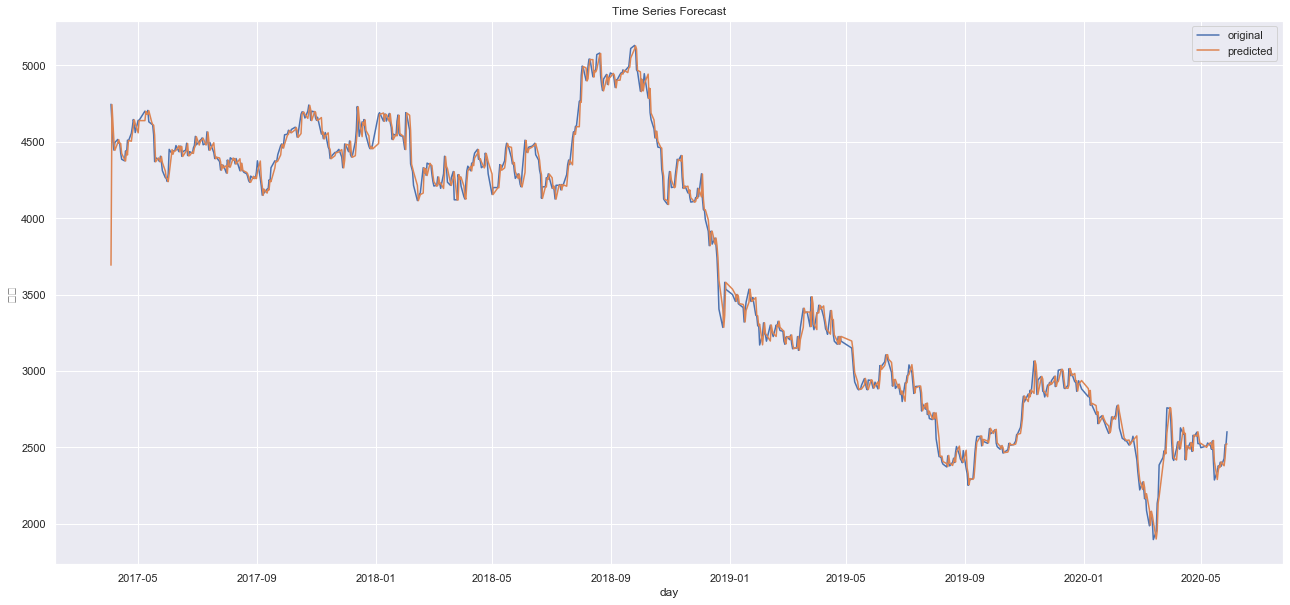

In [20]:
plt.figure(figsize=(22,10))
plt.plot(day['day'],end['end'],label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("day")
plt.ylabel("終値")
plt.legend()
plt.show()

In [21]:
end['end']

day
2017-04-03    4745.0
2017-04-04    4625.0
2017-04-05    4505.0
2017-04-06    4445.0
2017-04-07    4495.0
               ...  
2020-05-22    2377.0
2020-05-25    2427.0
2020-05-26    2518.0
2020-05-27    2520.0
2020-05-28    2603.0
Name: end, Length: 769, dtype: float64

In [22]:
def wma(milktea):
    
    weight = np.arange(len(milktea)) + 1
    wma = np.sum(weight * milktea) / weight.sum()
    
    return wma

In [23]:
def ema(milktea, period):
    ema = np.zeros(len(milktea))
    ema[:] = np.nan # NaN で一旦初期化
    ema[period-1] = milktea[:period].mean() # 最初だけ単純移動平均で算出
    
    for day in range(period, len(milktea)):
        ema[day] = ema[day-1] + (milktea[day] - ema[day-1]) / (period + 1) * 2
    
    return ema

In [24]:
end["加重移動平均(1)"]=end['end'].rolling(1).apply(wma, raw=True).round(1)
end["加重移動平均(7)"]=end['end'].rolling(7).apply(wma, raw=True).round(1)
end["加重移動平均(30)"]=end['end'].rolling(30).apply(wma, raw=True).round(1)

C:\home\anaconda\envs\TF\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\home\anaconda\envs\TF\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
end["指数移動平均(1)"]=ema(end['end'], 1).round(1)
end["指数移動平均(7)"]=ema(end['end'], 7).round(1)
end["指数移動平均(30)"]=ema(end['end'], 30).round(1)

In [26]:
print(end)

               end  加重移動平均(1)  加重移動平均(7)  加重移動平均(30)  指数移動平均(1)  指数移動平均(7)  \
day                                                                          
2017-04-03  4745.0     4745.0        NaN         NaN     4745.0        NaN   
2017-04-04  4625.0     4625.0        NaN         NaN     4625.0        NaN   
2017-04-05  4505.0     4505.0        NaN         NaN     4505.0        NaN   
2017-04-06  4445.0     4445.0        NaN         NaN     4445.0        NaN   
2017-04-07  4495.0     4495.0        NaN         NaN     4495.0        NaN   
...            ...        ...        ...         ...        ...        ...   
2020-05-22  2377.0     2377.0     2372.5      2461.5     2377.0     2393.5   
2020-05-25  2427.0     2427.0     2387.6      2457.3     2427.0     2401.9   
2020-05-26  2518.0     2518.0     2424.8      2459.3     2518.0     2430.9   
2020-05-27  2520.0     2520.0     2454.1      2461.4     2520.0     2453.2   
2020-05-28  2603.0     2603.0     2498.0      2468.8     2603.0 

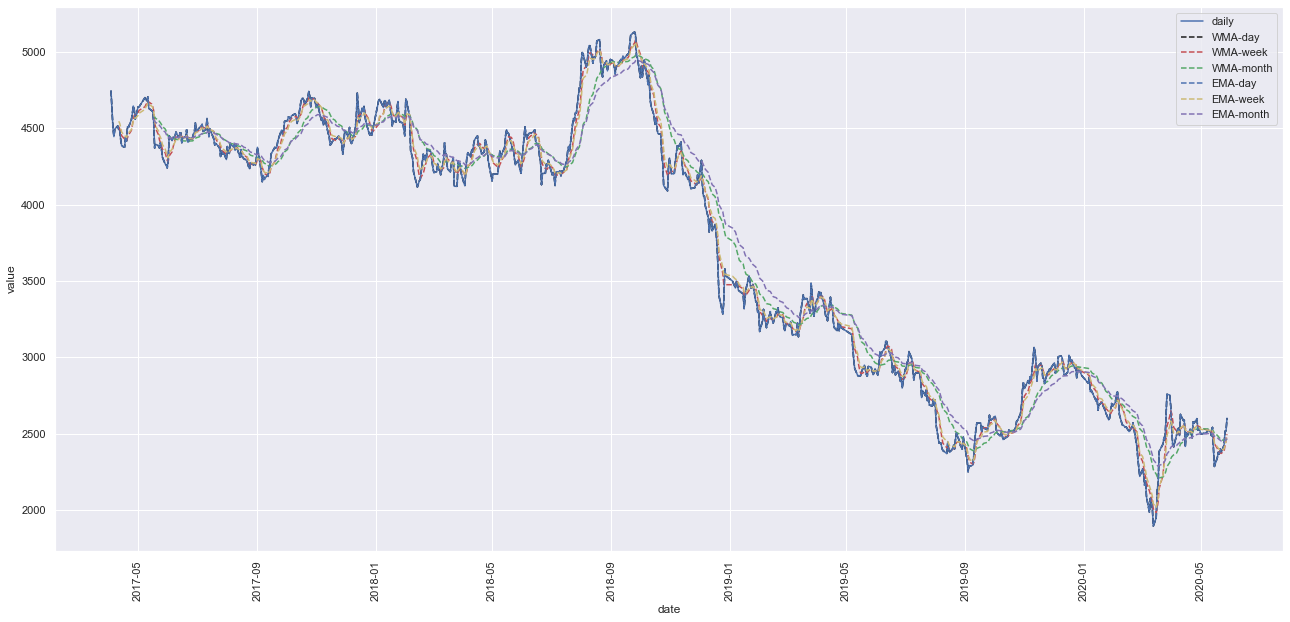

In [27]:
plt.figure(figsize=(22,10))
plt.plot(end['end'], label="daily")
plt.plot(end["加重移動平均(1)"], "k--", label="WMA-day")
plt.plot(end["加重移動平均(7)"], "r--", label="WMA-week")
plt.plot(end["加重移動平均(30)"], "g--", label="WMA-month")
plt.plot(end["指数移動平均(1)"], "b--", label="EMA-day")
plt.plot(end["指数移動平均(7)"], "y--", label="EMA-week")
plt.plot(end["指数移動平均(30)"], "m--", label="EMA-month")
plt.xticks(rotation=90)
plt.xlabel("date")
plt.ylabel("value")
plt.legend()

plt.show()

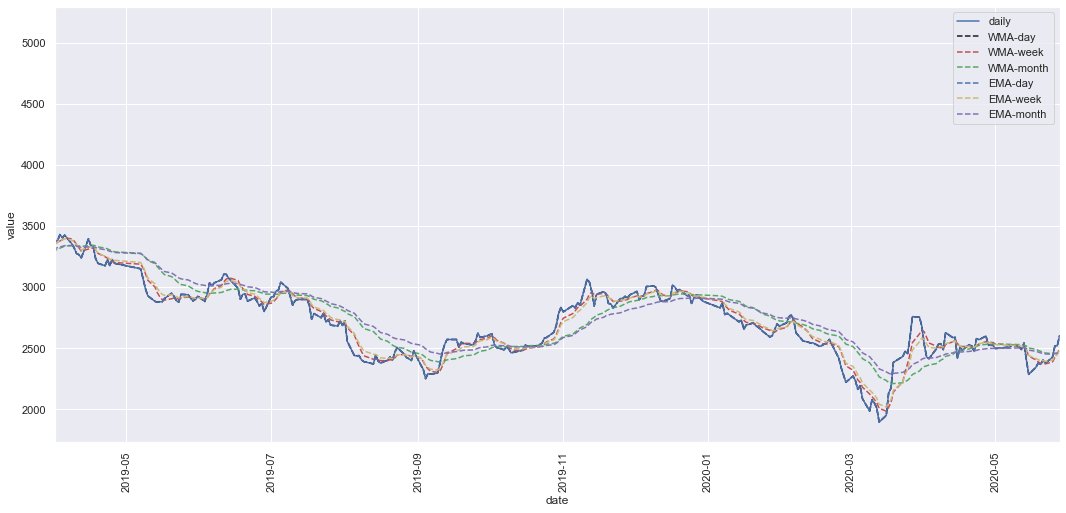

In [28]:
plt.figure(figsize=(18,8))
plt.plot(end['end'], label="daily")
plt.plot(end["加重移動平均(1)"], "k--", label="WMA-day")
plt.plot(end["加重移動平均(7)"], "r--", label="WMA-week")
plt.plot(end["加重移動平均(30)"], "g--", label="WMA-month")
plt.plot(end["指数移動平均(1)"], "b--", label="EMA-day")
plt.plot(end["指数移動平均(7)"], "y--", label="EMA-week")
plt.plot(end["指数移動平均(30)"], "m--", label="EMA-month")
plt.xlim('2019-04-01','2020-05-28')
plt.xticks(rotation=90)
plt.xlabel("date")
plt.ylabel("value")
plt.legend()

plt.show()

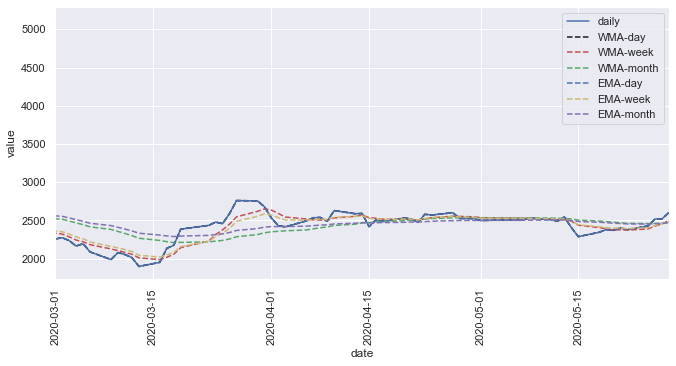

In [29]:
plt.figure(figsize=(11,5))
plt.plot(end['end'], label="daily")
plt.plot(end["加重移動平均(1)"], "k--", label="WMA-day")
plt.plot(end["加重移動平均(7)"], "r--", label="WMA-week")
plt.plot(end["加重移動平均(30)"], "g--", label="WMA-month")
plt.plot(end["指数移動平均(1)"], "b--", label="EMA-day")
plt.plot(end["指数移動平均(7)"], "y--", label="EMA-week")
plt.plot(end["指数移動平均(30)"], "m--", label="EMA-month")
plt.xlim('2020-03-01','2020-05-28')
plt.xticks(rotation=90)
plt.xlabel("date")
plt.ylabel("value")
plt.legend()

plt.show()

In [30]:
end["指数移動平均(60)"]=ema(end['end'], 60).round(1)
end["指数移動平均(180)"]=ema(end['end'], 180).round(1)
end["指数移動平均(365)"]=ema(end['end'], 365).round(1)

In [31]:
end["加重移動平均(60)"]=end['end'].rolling(60).apply(wma, raw=True).round(1)
end["加重移動平均(180)"]=end['end'].rolling(180).apply(wma, raw=True).round(1)
end["加重移動平均(365)"]=end['end'].rolling(365).apply(wma, raw=True).round(1)

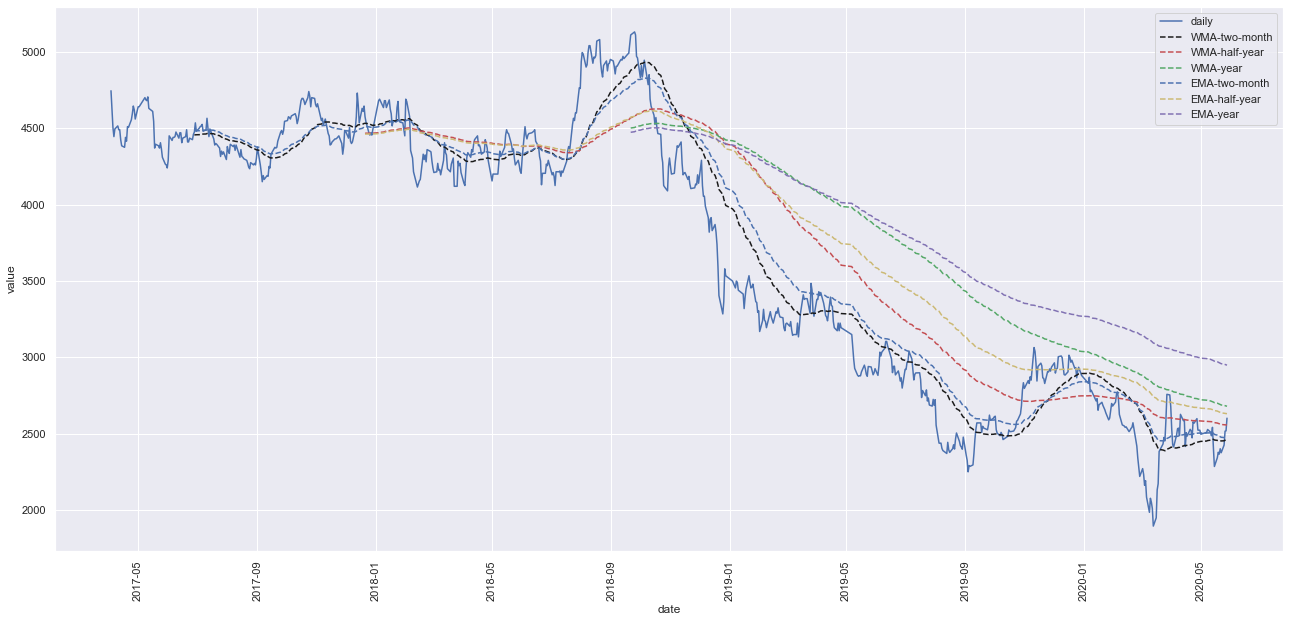

In [32]:
plt.figure(figsize=(22,10))
plt.plot(end['end'], label="daily")
plt.plot(end["加重移動平均(60)"], "k--", label="WMA-two-month")
plt.plot(end["加重移動平均(180)"], "r--", label="WMA-half-year")
plt.plot(end["加重移動平均(365)"], "g--", label="WMA-year")
plt.plot(end["指数移動平均(60)"], "b--", label="EMA-two-month")
plt.plot(end["指数移動平均(180)"], "y--", label="EMA-half-year")
plt.plot(end["指数移動平均(365)"], "m--", label="EMA-year")
plt.xticks(rotation=90)
plt.xlabel("date")
plt.ylabel("value")
plt.legend()

plt.show()

In [33]:
end['Sweek'] = (end['end']-end["指数移動平均(7)"]).round(1)
end['Smonth'] = (end['end']-end["指数移動平均(30)"]).round(1)
end['Stwomonth'] = (end['end']-end["指数移動平均(60)"]).round(1)
end['Kweek'] = (end['end']-end["加重移動平均(7)"]).round(1)
end['Kmonth'] = (end['end']-end["加重移動平均(30)"]).round(1)
end['Ktwomonth'] = (end['end']-end["加重移動平均(60)"]).round(1)

In [34]:
Sweek = (end['end']-end["指数移動平均(7)"]).round(1)
Smonth = (end['end']-end["指数移動平均(30)"]).round(1)
Stwomonth = (end['end']-end["指数移動平均(60)"]).round(1)
Kweek = (end['end']-end["加重移動平均(7)"]).round(1)
Kmonth = (end['end']-end["加重移動平均(30)"]).round(1)
Ktwomonth = (end['end']-end["加重移動平均(60)"]).round(1)

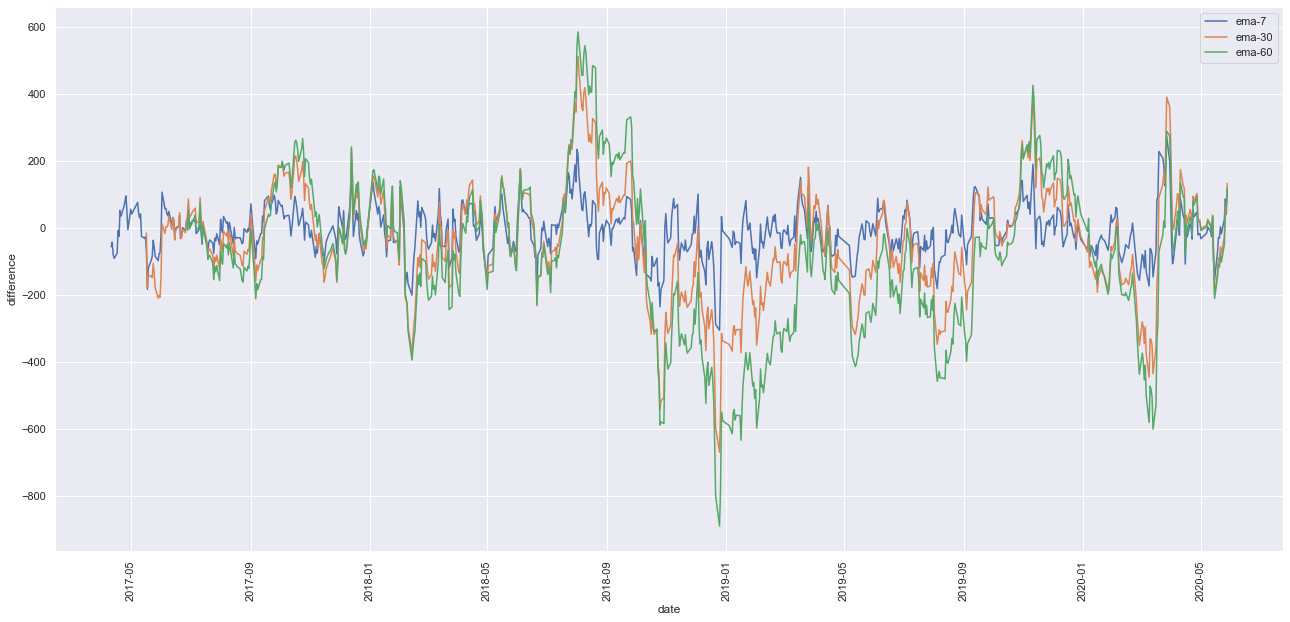

In [39]:
plt.figure(figsize=(22,10))
plt.plot(Sweek, label="ema-7")
plt.plot(Smonth, label="ema-30")
plt.plot(Stwomonth, label="ema-60")

plt.xticks(rotation=90)
plt.xlabel("date")
plt.ylabel("difference")
plt.legend()

plt.show()

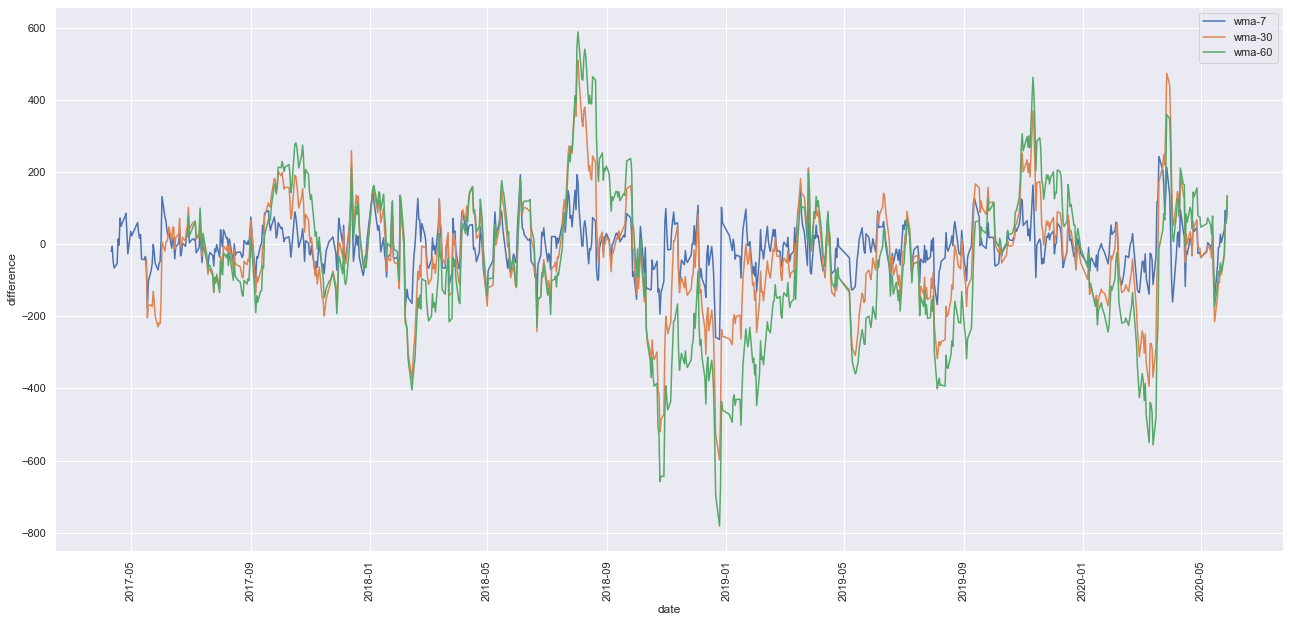

In [40]:
plt.figure(figsize=(22,10))
plt.plot(Kweek, label="wma-7")
plt.plot(Kmonth, label="wma-30")
plt.plot(Ktwomonth, label="wma-60")

plt.xticks(rotation=90)
plt.xlabel("date")
plt.ylabel("difference")
plt.legend()

plt.show()

In [ ]:
def Week():
    week = pd.DataFrame()


In [34]:
def Month():
    month = pd.DataFrame()
    
    for i in range(len(end)):
        if end["加重移動平均(30)"]

SyntaxError: invalid syntax (<ipython-input-34-506cd87be05c>, line 1)

In [ ]:
def TwoMonth():
    twomonth = pd.DataFrame()